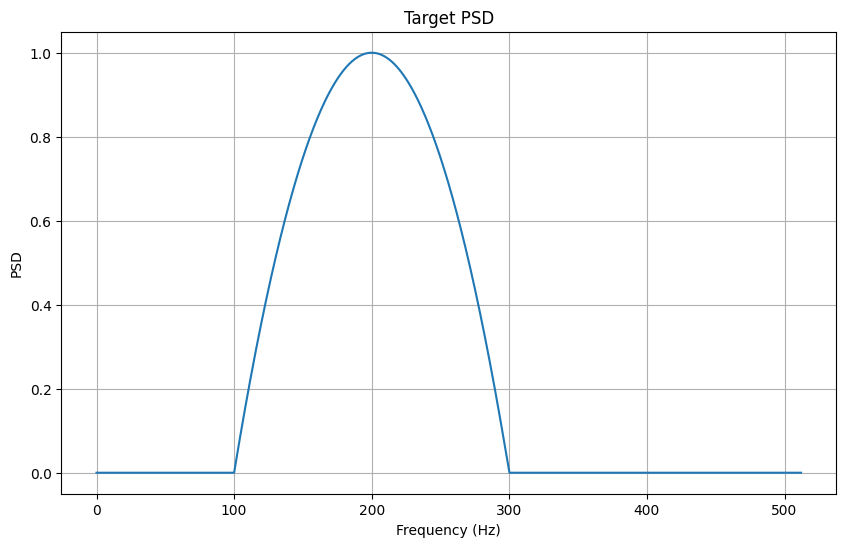

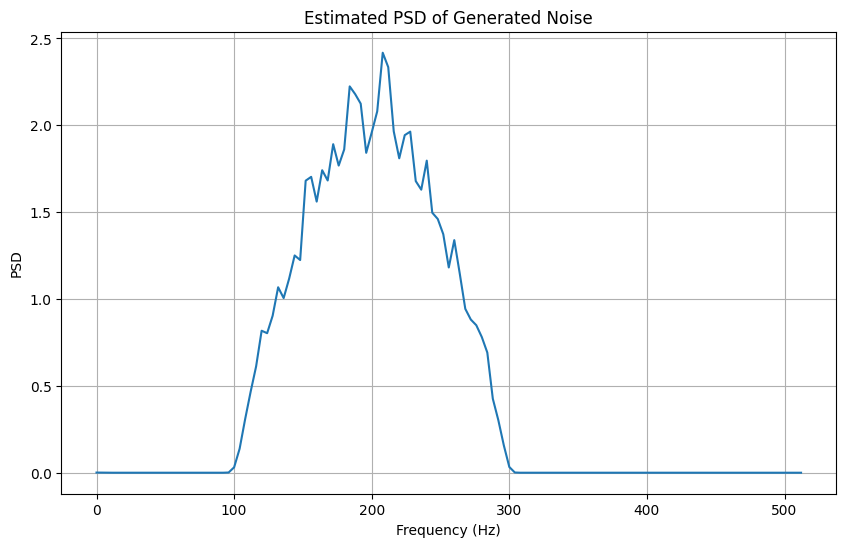

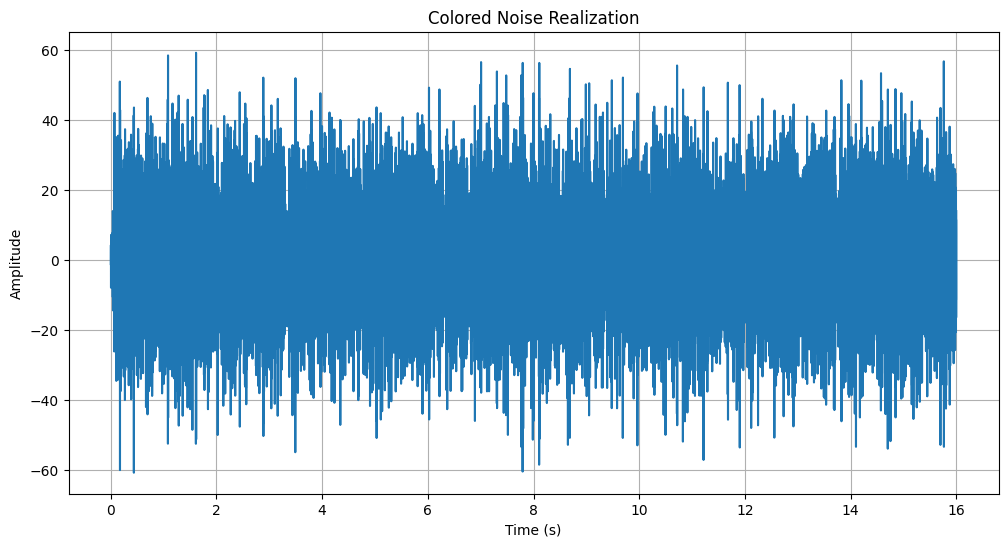

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# generate a realization of stationary Gaussian noise with given 2-sided PSD
# estimate the PSD using Welch's method


def statgaussnoisegen(n_samples, psd_vals, fltr_order, samp_freq):
    """
    Generate a realization of stationary Gaussian noise with given 2-sided PSD
    
    Parameters:
    n_samples : int
        Number of samples to generate
    psd_vals : array-like, shape (M, 2)
        Matrix containing frequencies and corresponding PSD values
        First column: frequencies, Second column: PSD values
        Frequencies must start from 0 and end at Fs/2
    fltr_order : int
        Order of the FIR filter to be used
    samp_freq : float
        Sampling frequency
        
    Returns:
    out_noise : ndarray
        Generated colored noise realization
    """
    
    # Design FIR filter with T(f) = square root of target PSD
    freq_vec = psd_vals[:, 0]
    sqrt_psd = np.sqrt(psd_vals[:, 1])

    
    # Design FIR filter using firwin2 
    b = signal.firwin2(fltr_order + 1, freq_vec, sqrt_psd, fs=samp_freq)
    
    # Generate white Gaussian noise realization
    in_noise = np.random.randn(n_samples)
    
    # Pass through the designed filter and scale
    out_noise = np.sqrt(samp_freq) * signal.fftconvolve(in_noise,b, mode='same')
    return out_noise

# Demo for colored Gaussian noise generation
# Sampling frequency for noise realization
samp_freq = 1024  # Hz

# Number of samples to generate
n_samples = 16384

# Time samples
time_vec = np.arange(n_samples) / samp_freq

# Target two-sided PSD given by the function
def target_psd(f):
    return np.where((f >= 100) & (f <= 300), (f - 100) * (300 - f) / 10000, 0)

# Plot PSD
freq_vec = np.arange(0, 512.1, 0.1)
psd_vec = target_psd(freq_vec)

plt.figure(figsize=(10, 6))
plt.plot(freq_vec, psd_vec)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('Target PSD')
plt.grid(True)
plt.show()

# Filter order
fltr_order = 500

# Generate noise realization
psd_vals = np.column_stack([freq_vec, psd_vec])
out_noise = statgaussnoisegen(n_samples, psd_vals, fltr_order, samp_freq)

# Estimate the PSD using Welch's method
f, pxx = signal.welch(out_noise, samp_freq, nperseg=256) 

# Plot the estimated PSD
plt.figure(figsize=(10, 6))
plt.plot(f, pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('Estimated PSD of Generated Noise')
plt.grid(True)
plt.show()

# Plot the colored noise realization
plt.figure(figsize=(12, 6))
plt.plot(time_vec, out_noise)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Colored Noise Realization')
plt.grid(True)
plt.show()